# The Multi-Tier Framework for measuring access to cooking solutions (Nepal)

### Preliminaries

According to [the MTF survey data](https://mtfenergyaccess.esmap.org/country/nepal), as of 2017, **62.7%** of Nepalese households **use a three-stone stove or traditional stove** as their primary stove and **26.3% use an LPG stove**.  Using the MTF definition, **25.7%** of the households in Nepal **are in MTF Tiers 3 or above.**

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report, [here](https://mtfenergyaccess.esmap.org/force-download/1527)

## General information

### Typologies of cookstoves

The various types of cookstove used in Nepal were classified into seven stove categories (see box 2 of the report for details & pictures):

- **Open fire biomass:** The most traditional method of cooking in Nepal. A pot is balanced on three stones over an open fire and fuel placed on the ground. 
- **Traditional biomass:** These are locally produced using available and low-cost materials and fuels, reflecting cultural practices. A Pot placed above fire on the enclosed combustion chamber while the fuel rests on ground.
- **Improved biomass:** The improved biomass stove uses newer stove technology compared to traditional stoves to improve efficiency, cleanliness, and safety. They may be built with local materials or be factory manufactured. In addition, improved biomass stoves may have some exhaust system.
- **Biogas:** The digester converts organic wastes and dung into combustible methane gas called biogas, which is piped from the digester to the cookstove.
- **Solar cookstoves:** Often called solar cookers, can be used in areas where solar energy is abundant for most of the year, typically between 30 degrees north and south of the equator. There are several types of solar cookers: panel cookers with a clamshell shape, box cookers that fully enclose the pot, parabolic cookers that resemble a satellite dish, and vacuum tube cookers that work like greenhouses.
- **Liquefied petroleum gas (LPG):** Exclusively burn LPG, which is a gaseous fuel obtained during petroleum refining and consists mainly of butane or propane. For distribution to the end-user, LPG is bottled in individual gas cylinders of various sizes (between 3 kg and 50 kg or larger).
- **Electric cookstoves:** Convert electrical energy into heat for cooking. Electric stoves can be either an induction type stove or an electric coil stove

> The last 4 are considered as clean stove types

## Analysis

Measuring access to modern energy cooking solutions in Nepal is crucial, as the country has historically relied heavily on solid biomass, and making concerted efforts to change this trend is key to numerous potential positive outcomes.

> The questions related to cooking are in the sections I & J. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
#main_dataset = pd.read_stata('raw_data/dta/maindataset.dta')
main_dataset = pd.read_csv('raw_data/csv/main.csv')
main_dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
main_dataset.head()

,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,M32,M33,O1,O2,O2_SO,O2_SO_Recode,O3,O3_con,O4,TIME_END_VISIT1
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,8000.0,5000.0,1,1.0,NaN,NaN,8.0,0.406990,1200000.0,2017-11-11T02:49:33Z
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,15.0,0.763106,2000000.0,2017-11-11T04:04:27Z
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,15000.0,10000.0,1,1.0,NaN,NaN,9.0,0.457863,1350000.0,2017-11-11T04:47:09Z
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,8.0,0.406990,1000000.0,2017-11-11T05:41:59Z
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,5.0,0.254369,600000.0,2017-11-11T07:00:32Z


In [4]:
#Extracting columns corresponding to Household information and Cooking Questions (I & J Sections)
all_columns = main_dataset.columns
household_info_columns = all_columns[:19]

In [5]:
I_section = [column for column in all_columns if column.startswith('I')]
I_section = I_section[2:]
I_section.sort()

In [6]:
J_section = [column for column in all_columns if column.startswith('J')]
J_section.sort()

In [7]:
target_columns = list(itertools.chain(household_info_columns ,I_section ,J_section))

In [8]:
cooking = main_dataset[target_columns]

In [9]:
cooking.head()

,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,J3__4,J3__5,J3__6,J3__7,J3__8,J40,J41,J42,J43,J44
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,15.0,10.0,3.0,8.0,4.0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,6.0,9.0,1.0,5.0,2.0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,7.0,NaN,1.0,6.0,2.0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,9.0,6.0,1.0,5.0,3.0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0,0,0,0,0,8.0,NaN,1.0,5.0,2.0


### Fuels used for cooking

In Nepal, households are still heavily reliant on biomass to meet their cooking needs. The share of the
total households using a fuel indicates the nationwide dependency on different fuel types. Firewood
is the most widely used source of cooking fuel.

As seen on the image below, the responses corresponding to this part are in section `I2` and up to 18 possible types were to be multiselected.

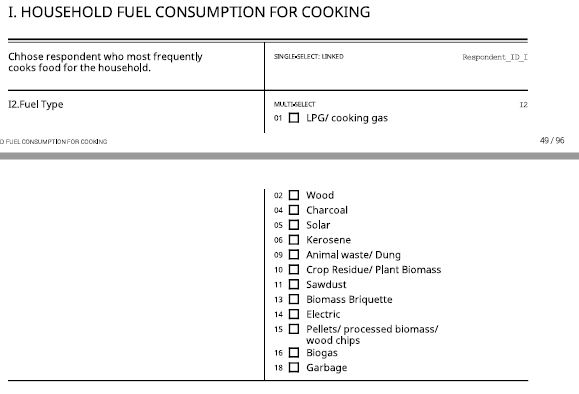

In [10]:
Image('references/fuel type.JPG')

In [11]:
#Extracting columns related to the fuel type
fuel_response_columns = [column for column in I_section if column.startswith('I2')]
fuel_type = cooking[fuel_response_columns]

In [12]:
fuel_type.head()

,I2__1,I2__10,I2__11,I2__13,I2__14,I2__15,I2__16,I2__18,I2__2,I2__4,I2__5,I2__6,I2__9
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
#Replacing the columns' name with corresponding fuel type in questionaire dictionary
columns_mapping = {'I2__1':'LPG/Cooking gas', 'I2__10':'Crop Residue/Plant Biomas', 'I2__11':'Sawdust',
                   'I2__13':'Biomas Briquette', 'I2__14':'Electric', 'I2__15':'Pellets/Processes biomass/wood chips',
                   'I2__16':'Biogas', 'I2__18':'Garbage', 'I2__2':'Wood', 'I2__4':'Charcoal', 'I2__5':'Solar',
                   'I2__6':'Kerosene', 'I2__9':'Animal waste/Dung'}
fuel_type = fuel_type.rename(columns = columns_mapping)

#Replacing the answer No with False and Yes with True to easy the calculations
#response_mapping = {'0':False, '1':True}
#fuel_type = fuel_type.replace(response_mapping)

In [14]:
fuel_type.head()

,LPG/Cooking gas,Crop Residue/Plant Biomas,Sawdust,Biomas Briquette,Electric,Pellets/Processes biomass/wood chips,Biogas,Garbage,Wood,Charcoal,Solar,Kerosene,Animal waste/Dung
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [15]:
#Calculating the percentage contribution and considering only the fuel type reported in the report
fuel_type_df = (fuel_type.sum()*100/6000).to_frame().reset_index().rename(columns = {'index':'Fuel Type', 0:'% Population'})

In [16]:
types_mapping = {'Electric':'Electric/Solar', 'Solar':'Electric/Solar', 'Animal waste/Dung':'Dung',
                'Crop Residue/Plant Biomas':'Crop residue', 'Pellets/Processes biomass/wood chips':'Processed biomas'}
fuel_type_df['Fuel Type'] = fuel_type_df['Fuel Type'].replace(types_mapping)

In [17]:
fuel_type_df = fuel_type_df.groupby(['Fuel Type']).sum().reset_index()

In [18]:
#Extracting only those reported & fixing the counts to 1 decimal
fuel_type_df = fuel_type_df[~fuel_type_df['Fuel Type'].isin(['Biomas Briquette','Kerosene','Garbage'])]

In [19]:
fuel_type_df['% Population'] = fuel_type_df['% Population'].apply(lambda x: round(x,1))
fuel_type_df

,Fuel Type,% Population
0,Biogas,1.9
2,Charcoal,0.2
3,Crop residue,1.2
4,Dung,3.3
5,Electric/Solar,0.5
8,LPG/Cooking gas,39.3
9,Processed biomas,0.1
10,Sawdust,0.2
11,Wood,68.5


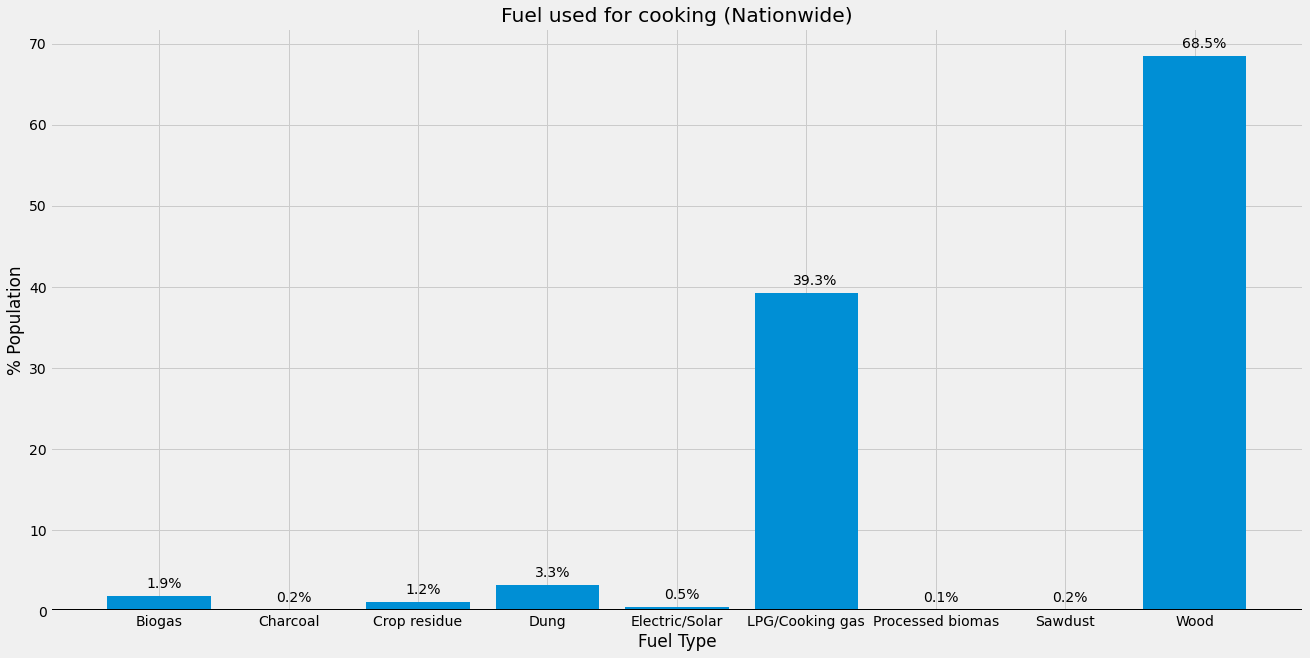

In [20]:
#Ploting the result
plt.figure(figsize = (20,10))
plt.bar(fuel_type_df['Fuel Type'], fuel_type_df['% Population']);
plt.axhline(0, color = 'black')
plt.title('Fuel used for cooking (Nationwide)')
plt.ylabel('% Population')
plt.xlabel('Fuel Type')
for i,pop in enumerate(fuel_type_df['% Population']):
    plt.text(i-0.1,pop+1, f'{pop}%')

> The numbers from this analysis are small compared to what is in the report!

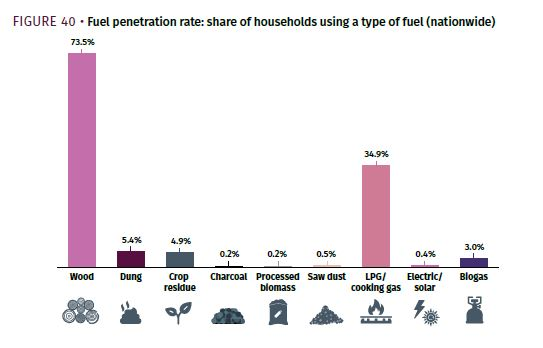

In [21]:
Image('references/Fuel penetration rate nationwide.JPG')

### Distribution of Primary Stoves (Urban - Rural)

In urban areas, about half of the households use a clean-fuel stove as their primary stove. Biomass stove users are the overwhelming majority in rural areas.

Answers related to this question is in Section J Question 3. Whether a household is in urban or rural area can be found in column `LOCALITY` of the main dataset.

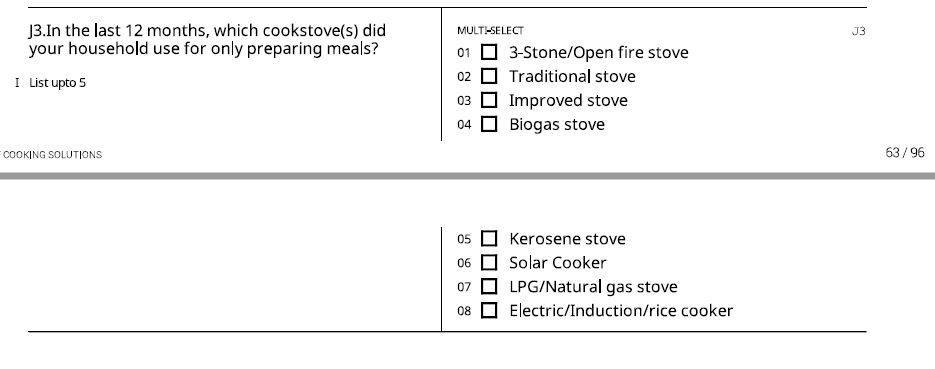

In [22]:
Image('references/cookstove(s) used for preparing meals.JPG')

In [23]:
#cookstoves = pd.read_stata('raw_data/dta/J_Cookstove.dta')
cookstoves = pd.read_csv('raw_data/csv/J.csv')

In [24]:
cookstoves.head(2)

,Unnamed: 0,HHID,Id,J4,J5,J6,J7,J7_SO,J7_SO_RECODE,J8,...,J35__6,J35__7,J35__8,J35__9,J35__10,J35__555,J35_SO,J35_SO_RECODE,J37_A,J37_B
0,1,110148801,3,2.0,NaN,NaN,4.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,110148802,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [25]:
stoves_mapping = {1:'3-Stone/Open fire stove', 2:'Traditional stove', 3:'Improved stove',
                 4:'Biogas stove', 5:'Kerosene stove', 6:'Solar Cooker',
                 7:'LPG/Natural gas stove',8:'Electric/Induction/rice cooker'}

cookstoves['Type'] = cookstoves['Id'].replace(stoves_mapping)

In [26]:
# # Check if this is necessary in order to gather more stoves per households
# import numpy as np
# stove_labels = np.unique(cookstoves["Id"])
# cookstoves.loc[cookstoves["HHID"]==row["HHID"]]
# hh_stoves = []
# for index,row in main_dataset.iterrows():
    
#     df = cookstoves.loc[cookstoves["HHID"]==str(row["HHID"])]
#     hh_stoves.append(df["Id"].tolist())

    
# main_dataset["Stoves"]=hh_stoves

> Didn't get it and running it is giving an error or an empty list. I think it is related to stove stacking discussed in the next section

In [27]:
#Combining the cookstove types with localities using the HHID and counting the percentages in each locality
cookstoves_locality = pd.merge(cookstoves, main_dataset[['HHID','LOCALITY']], how = 'left', on = 'HHID')
locality_mappings = {1:'Urban', 2:'Rural'}
cookstoves_locality['LOCALITY'].replace(locality_mappings, inplace = True)
cookstoves_locality = cookstoves_locality[['LOCALITY','Type']].groupby(['Type','LOCALITY']).size().unstack()
cookstoves_locality.columns = cookstoves_locality.columns.to_list() # Removing the categorical columns
cookstoves_locality.reset_index(inplace = True)

In [28]:
cookstoves_locality

,Type,Rural,Urban
0,3-Stone/Open fire stove,738.0,458.0
1,Biogas stove,68.0,72.0
2,Electric/Induction/rice cooker,5.0,49.0
3,Improved stove,385.0,215.0
4,Kerosene stove,NaN,1.0
5,LPG/Natural gas stove,543.0,1799.0
6,Solar Cooker,NaN,1.0
7,Traditional stove,1372.0,1204.0


In [29]:
#Mapping Ids to names used in the report & removing those with 0 or 1 frequency
ids_mapping = {'3-Stone/Open fire stove':'Open fire stove', 'Electric/Induction/rice cooker':'Electric'}
cookstoves_locality.replace(ids_mapping, inplace = True)
cookstoves_locality = cookstoves_locality[cookstoves_locality['Rural'].notnull()]

In [30]:
#Finding the percentages
cookstoves_locality['Urban'] = round((cookstoves_locality['Urban']/sum(cookstoves_locality['Urban'])*100),1)
cookstoves_locality['Rural'] = round((cookstoves_locality['Rural']/sum(cookstoves_locality['Rural'])*100),1)
cookstoves_locality.set_index('Type', inplace = True)

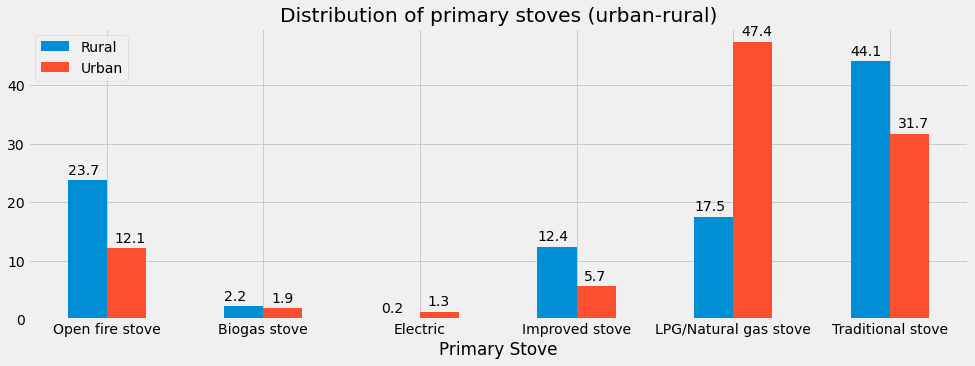

In [31]:
#Ploting
cookstoves_locality.plot.bar(figsize = (15,5))
urban = cookstoves_locality['Urban']
rural = cookstoves_locality['Rural']

for i in range(len(urban)):
    plt.text(i+0.05,urban[i] + 1, f'{urban[i]}')
    plt.text(i-0.25,rural[i] + 1, f'{rural[i]}')

plt.title('Distribution of primary stoves (urban-rural)')
plt.xlabel('Primary Stove')
plt.xticks(rotation = 0);

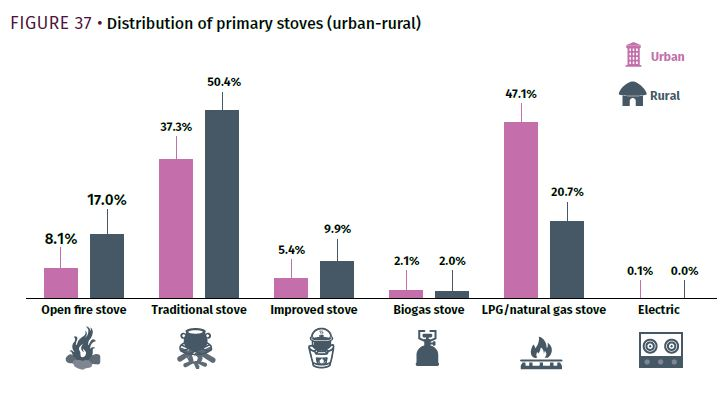

In [32]:
Image('references/Distribution of primary stoves.JPG')

> Values in the reports are higher except for the Electric and Open fire stove they are lower.

### Stove Stacking

#### Number of stoves

While most of the households in Nepal use only one type of stove, there are some households that use two or more different types at the same time. Most households that stack use an LPG stove along with a biomass stove. The two most common forms of stacking are to use an LPG stove with a traditional stove or with an open fire stove.

In [33]:
cookstoves_stack = (cookstoves['HHID'].value_counts().to_frame()['HHID'].value_counts(normalize=True, ascending = True)*100).to_frame()
cookstoves_stack.reset_index(inplace = True)
cookstoves_stack.columns = ['Number of stoves', '% Households']
cookstoves_stack.replace({1 : '1 Stove', 2 : '2 Stoves', 3 : '3 Stoves'}, inplace = True)
cookstoves_stack.set_index('Number of stoves', inplace = True)

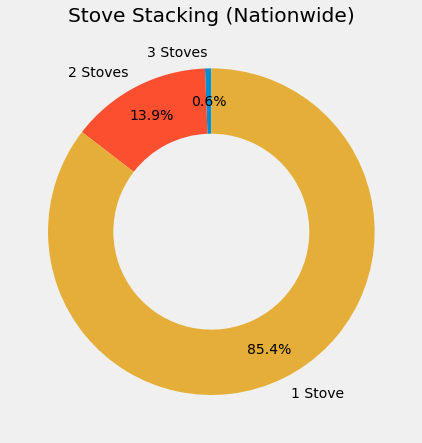

In [34]:
#Ploting
cookstoves_stack['% Households'].plot.pie(wedgeprops= {'width' :0.4}, startangle=90, figsize = (7,7),
                                          autopct = lambda p: f'{p:.1f}%', pctdistance=0.8);
plt.title('Stove Stacking (Nationwide)');
plt.ylabel('');

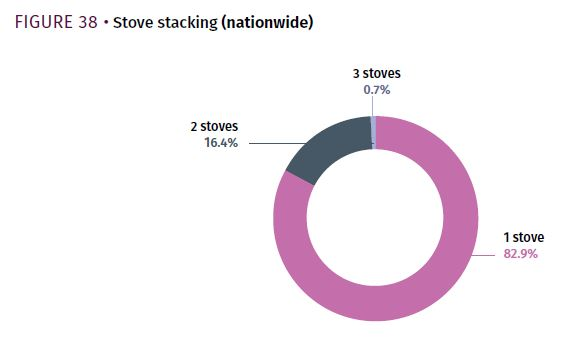

In [35]:
Image('references/Stove stacking nationwide.JPG')

> The values for 1 stove and for 2 stoves don't match those reported.

#### Stack Combinations

Most households that stack use an LPG stove along with a biomass stove. More households using LPG stoves with a biomass stove consider the biomass stove as the primary stove and use the biomass stove for longer periods of time compared to the LPG stove.

The question asking whether the stove is primary or not is J34

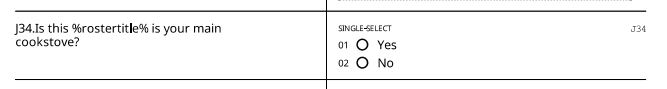

In [36]:
Image('references/Main Stove Question J34.JPG')

In [37]:
#Combining the Stove with Status (Main/Not Main)
cookstoves['Type_Status'] = cookstoves['Type'] + '_' + cookstoves['J34'].astype(str)

In [38]:
# The stoves combinations
households_stoves = cookstoves[['HHID','Type_Status']].groupby('HHID')
households_stoves.apply(print)

        HHID       Type_Status
0  110148801  Improved stove_1
        HHID                Type_Status
1  110148802  3-Stone/Open fire stove_1
2  110148802           Improved stove_1
        HHID          Type_Status
3  110148803  Traditional stove_1
        HHID                Type_Status
4  110148804  3-Stone/Open fire stove_1
        HHID                Type_Status
5  110148805  3-Stone/Open fire stove_1
        HHID          Type_Status
6  110148806  Traditional stove_1
        HHID                Type_Status
7  110148807  3-Stone/Open fire stove_1
        HHID          Type_Status
8  110148808  Traditional stove_1
        HHID          Type_Status
9  110148809  Traditional stove_1
         HHID                Type_Status
10  110148810  3-Stone/Open fire stove_1
         HHID          Type_Status
11  110148811  Traditional stove_1
         HHID                Type_Status
12  110148812  3-Stone/Open fire stove_1
         HHID          Type_Status
13  110148813  Traditional stove_1
  

          HHID          Type_Status
191  111145602  Traditional stove_1
          HHID          Type_Status
192  111145603  Traditional stove_1
          HHID          Type_Status
193  111145604  Traditional stove_1
          HHID                Type_Status
194  111145605    LPG/Natural gas stove_1
195  111145605  3-Stone/Open fire stove_2
          HHID          Type_Status
196  111145606  Traditional stove_1
          HHID          Type_Status
197  111145607  Traditional stove_1
          HHID          Type_Status
198  111145608  Traditional stove_1
          HHID          Type_Status
199  111145609  Traditional stove_1
          HHID          Type_Status
200  111145610  Traditional stove_1
          HHID              Type_Status
201  111145611  LPG/Natural gas stove_2
202  111145611      Traditional stove_1
          HHID       Type_Status
203  111145612  Improved stove_1
          HHID          Type_Status
204  111145613  Traditional stove_1
          HHID          Type_Status
205 

          HHID          Type_Status
333  132222911  Traditional stove_1
          HHID                Type_Status
334  132222912  3-Stone/Open fire stove_1
          HHID                Type_Status
335  132222913  3-Stone/Open fire stove_1
          HHID       Type_Status
336  132222914  Improved stove_1
          HHID          Type_Status
337  132222915  Traditional stove_1
          HHID              Type_Status
338  132223001  LPG/Natural gas stove_2
339  132223001      Traditional stove_1
          HHID                Type_Status
340  132223002  3-Stone/Open fire stove_1
          HHID              Type_Status
341  132223003      Traditional stove_1
342  132223003  LPG/Natural gas stove_2
          HHID              Type_Status
343  132223004  LPG/Natural gas stove_1
          HHID                Type_Status
344  132223005  3-Stone/Open fire stove_1
          HHID                Type_Status
345  132223006  3-Stone/Open fire stove_1
          HHID              Type_Status
346  13222

          HHID                Type_Status
453  132343407  3-Stone/Open fire stove_1
          HHID                Type_Status
454  132343408  3-Stone/Open fire stove_1
          HHID                Type_Status
455  132343409  3-Stone/Open fire stove_1
          HHID                Type_Status
456  132343410  3-Stone/Open fire stove_1
          HHID                Type_Status
457  132343411    LPG/Natural gas stove_1
458  132343411  3-Stone/Open fire stove_2
          HHID                Type_Status
459  132343412  3-Stone/Open fire stove_1
          HHID                Type_Status
460  132343413  3-Stone/Open fire stove_1
          HHID                Type_Status
461  132343414  3-Stone/Open fire stove_1
          HHID                Type_Status
462  132343415  3-Stone/Open fire stove_1
          HHID              Type_Status
463  132343501      Traditional stove_1
464  132343501  LPG/Natural gas stove_1
          HHID                Type_Status
465  132343502  3-Stone/Open fire stove_

          HHID                Type_Status
586  132344114  3-Stone/Open fire stove_1
          HHID                Type_Status
587  132344115  3-Stone/Open fire stove_1
          HHID                Type_Status
588  132344201  3-Stone/Open fire stove_1
589  132344201    LPG/Natural gas stove_1
          HHID                Type_Status
590  132344202  3-Stone/Open fire stove_1
591  132344202    LPG/Natural gas stove_1
          HHID                Type_Status
592  132344203        Traditional stove_1
593  132344203  3-Stone/Open fire stove_1
          HHID                Type_Status
594  132344204        Traditional stove_1
595  132344204  3-Stone/Open fire stove_1
          HHID              Type_Status
596  132344205      Traditional stove_1
597  132344205  LPG/Natural gas stove_1
          HHID                Type_Status
598  132344206    LPG/Natural gas stove_1
599  132344206  3-Stone/Open fire stove_1
          HHID                Type_Status
600  132344207  3-Stone/Open fire stove_

          HHID       Type_Status
718  166327009  Improved stove_1
          HHID       Type_Status
719  166327010  Improved stove_1
          HHID       Type_Status
720  166327011  Improved stove_1
          HHID       Type_Status
721  166327012  Improved stove_1
          HHID       Type_Status
722  166327013  Improved stove_1
          HHID       Type_Status
723  166327014  Improved stove_1
          HHID       Type_Status
724  166327015  Improved stove_1
          HHID       Type_Status
725  166327101  Improved stove_1
          HHID       Type_Status
726  166327102  Improved stove_1
          HHID       Type_Status
727  166327103  Improved stove_1
          HHID       Type_Status
728  166327104  Improved stove_1
          HHID       Type_Status
729  166327105  Improved stove_1
          HHID              Type_Status
730  166327106  LPG/Natural gas stove_1
          HHID              Type_Status
731  166327107         Improved stove_1
732  166327107  LPG/Natural gas stove_1
        

          HHID              Type_Status
838  166428714      Traditional stove_1
839  166428714  LPG/Natural gas stove_1
          HHID                Type_Status
840  166428715  3-Stone/Open fire stove_1
          HHID              Type_Status
841  166428801  LPG/Natural gas stove_1
          HHID          Type_Status
842  166428802  Traditional stove_1
          HHID              Type_Status
843  166428803  LPG/Natural gas stove_1
          HHID                Type_Status
844  166428804  3-Stone/Open fire stove_1
          HHID          Type_Status
845  166428805  Traditional stove_1
          HHID              Type_Status
846  166428806  LPG/Natural gas stove_1
847  166428806      Traditional stove_2
          HHID          Type_Status
848  166428807  Traditional stove_1
          HHID          Type_Status
849  166428808  Traditional stove_1
          HHID          Type_Status
850  166428809  Traditional stove_1
          HHID          Type_Status
851  166428810  Traditional stove_1


          HHID          Type_Status
973  176716708  Traditional stove_1
          HHID          Type_Status
974  176716709  Traditional stove_1
          HHID          Type_Status
975  176716710  Traditional stove_1
          HHID          Type_Status
976  176716711  Traditional stove_1
          HHID          Type_Status
977  176716712  Traditional stove_1
          HHID          Type_Status
978  176716713  Traditional stove_1
          HHID          Type_Status
979  176716714  Traditional stove_1
          HHID          Type_Status
980  176716715  Traditional stove_1
          HHID       Type_Status
981  176716801  Improved stove_1
          HHID       Type_Status
982  176716802  Improved stove_1
          HHID       Type_Status
983  176716803  Improved stove_1
          HHID       Type_Status
984  176716804  Improved stove_1
          HHID       Type_Status
985  176716805  Improved stove_1
          HHID       Type_Status
986  176716806  Improved stove_1
          HHID       Type_St

           HHID                Type_Status
1184  177520009  3-Stone/Open fire stove_1
1185  177520009        Traditional stove_1
           HHID                Type_Status
1186  177520010  3-Stone/Open fire stove_1
1187  177520010        Traditional stove_1
           HHID                Type_Status
1188  177520011  3-Stone/Open fire stove_1
           HHID          Type_Status
1189  177520012  Traditional stove_1
           HHID                Type_Status
1190  177520013  3-Stone/Open fire stove_1
           HHID          Type_Status
1191  177520014  Traditional stove_1
           HHID                Type_Status
1192  177520015        Traditional stove_1
1193  177520015  3-Stone/Open fire stove_1
           HHID          Type_Status
1194  177520701  Traditional stove_1
           HHID          Type_Status
1195  177520702  Traditional stove_1
           HHID              Type_Status
1196  177520703  LPG/Natural gas stove_1
1197  177520703      Traditional stove_1
           HHID       

           HHID                Type_Status
1312  177521308        Traditional stove_1
1313  177521308  3-Stone/Open fire stove_1
           HHID                Type_Status
1314  177521309  3-Stone/Open fire stove_1
           HHID                Type_Status
1315  177521310        Traditional stove_1
1316  177521310  3-Stone/Open fire stove_1
           HHID                Type_Status
1317  177521311  3-Stone/Open fire stove_1
           HHID          Type_Status
1318  177521312  Traditional stove_1
           HHID                Type_Status
1319  177521313  3-Stone/Open fire stove_1
           HHID          Type_Status
1320  177521314  Traditional stove_1
           HHID                Type_Status
1321  177521315  3-Stone/Open fire stove_1
           HHID          Type_Status
1322  177521401  Traditional stove_1
           HHID                Type_Status
1323  177521402  3-Stone/Open fire stove_1
1324  177521402        Traditional stove_1
           HHID          Type_Status
1325  1775

           HHID                Type_Status
1426  210237511  3-Stone/Open fire stove_1
           HHID          Type_Status
1427  210237512  Traditional stove_1
           HHID          Type_Status
1428  210237513  Traditional stove_1
           HHID          Type_Status
1429  210237514  Traditional stove_1
           HHID                Type_Status
1430  210237515  3-Stone/Open fire stove_1
           HHID          Type_Status
1431  210324501  Traditional stove_1
           HHID          Type_Status
1432  210324502  Traditional stove_1
           HHID          Type_Status
1433  210324503  Traditional stove_1
           HHID          Type_Status
1434  210324504  Traditional stove_1
           HHID          Type_Status
1435  210324505  Traditional stove_1
           HHID          Type_Status
1436  210324506  Traditional stove_1
           HHID              Type_Status
1437  210324507  LPG/Natural gas stove_1
           HHID              Type_Status
1438  210324508  LPG/Natural gas stove_

           HHID          Type_Status
1637  211017809  Traditional stove_1
           HHID          Type_Status
1638  211017810  Traditional stove_1
           HHID          Type_Status
1639  211017811  Traditional stove_1
           HHID          Type_Status
1640  211017812  Traditional stove_1
           HHID          Type_Status
1641  211017813  Traditional stove_1
           HHID          Type_Status
1642  211017814  Traditional stove_1
           HHID          Type_Status
1643  211017815  Traditional stove_1
           HHID          Type_Status
1644  211017901  Traditional stove_1
           HHID       Type_Status
1645  211017902  Improved stove_1
           HHID                Type_Status
1646  211017903  3-Stone/Open fire stove_1
           HHID          Type_Status
1647  211017904  Traditional stove_1
           HHID          Type_Status
1648  211017905  Traditional stove_1
           HHID          Type_Status
1649  211017906  Traditional stove_1
           HHID       Type_Statu

           HHID          Type_Status
1869  211449605  Traditional stove_1
           HHID              Type_Status
1870  211449606  LPG/Natural gas stove_1
           HHID              Type_Status
1871  211449607  LPG/Natural gas stove_1
           HHID          Type_Status
1872  211449608  Traditional stove_1
           HHID              Type_Status
1873  211449609  LPG/Natural gas stove_1
           HHID              Type_Status
1874  211449610  LPG/Natural gas stove_1
           HHID              Type_Status
1875  211449611  LPG/Natural gas stove_1
           HHID              Type_Status
1876  211449612  LPG/Natural gas stove_1
           HHID              Type_Status
1877  211449613  LPG/Natural gas stove_1
           HHID              Type_Status
1878  211449614  LPG/Natural gas stove_1
           HHID              Type_Status
1879  211449615  LPG/Natural gas stove_1
           HHID          Type_Status
1880  211449701  Traditional stove_1
           HHID          Type_Status
188

           HHID          Type_Status
2073  232139407       Biogas stove_2
2074  232139407  Traditional stove_1
           HHID                Type_Status
2075  232139408  3-Stone/Open fire stove_1
           HHID              Type_Status
2076  232139409  LPG/Natural gas stove_1
           HHID              Type_Status
2077  232139410      Traditional stove_1
2078  232139410  LPG/Natural gas stove_2
           HHID                Type_Status
2079  232139411  3-Stone/Open fire stove_1
           HHID              Type_Status
2080  232139412  LPG/Natural gas stove_2
2081  232139412      Traditional stove_1
           HHID          Type_Status
2082  232139413  Traditional stove_1
           HHID          Type_Status
2083  232139414  Traditional stove_1
           HHID              Type_Status
2084  232139415      Traditional stove_2
2085  232139415  LPG/Natural gas stove_1
           HHID              Type_Status
2086  232139501  LPG/Natural gas stove_1
           HHID              Type_St

           HHID          Type_Status
2210  232430410  Traditional stove_1
           HHID                Type_Status
2211  232430411  3-Stone/Open fire stove_1
           HHID          Type_Status
2212  232430412  Traditional stove_1
           HHID                Type_Status
2213  232430413  3-Stone/Open fire stove_2
2214  232430413    LPG/Natural gas stove_1
           HHID              Type_Status
2215  232430414      Traditional stove_1
2216  232430414  LPG/Natural gas stove_1
           HHID              Type_Status
2217  232430415  LPG/Natural gas stove_1
           HHID          Type_Status
2218  232430501  Traditional stove_1
           HHID          Type_Status
2219  232430502  Traditional stove_1
2220  232430502     Improved stove_1
           HHID          Type_Status
2221  232430503  Traditional stove_1
           HHID          Type_Status
2222  232430504     Improved stove_2
2223  232430504  Traditional stove_1
           HHID          Type_Status
2224  232430505     Impro

           HHID              Type_Status
2365  232520611  LPG/Natural gas stove_1
           HHID              Type_Status
2366  232520612  LPG/Natural gas stove_1
           HHID              Type_Status
2367  232520613  LPG/Natural gas stove_1
           HHID              Type_Status
2368  232520614  LPG/Natural gas stove_1
           HHID              Type_Status
2369  232520615  LPG/Natural gas stove_1
           HHID              Type_Status
2370  232630101  LPG/Natural gas stove_1
           HHID              Type_Status
2371  232630102  LPG/Natural gas stove_1
           HHID              Type_Status
2372  232630103  LPG/Natural gas stove_1
           HHID              Type_Status
2373  232630104  LPG/Natural gas stove_1
           HHID              Type_Status
2374  232630105  LPG/Natural gas stove_1
           HHID              Type_Status
2375  232630106  LPG/Natural gas stove_1
           HHID              Type_Status
2376  232630107  LPG/Natural gas stove_1
           HHID 

           HHID                Type_Status
2512  232836104    LPG/Natural gas stove_1
2513  232836104  3-Stone/Open fire stove_1
           HHID                Type_Status
2514  232836105    LPG/Natural gas stove_1
2515  232836105  3-Stone/Open fire stove_1
           HHID              Type_Status
2516  232836106  LPG/Natural gas stove_1
           HHID              Type_Status
2517  232836107  LPG/Natural gas stove_1
           HHID              Type_Status
2518  232836108  LPG/Natural gas stove_1
           HHID              Type_Status
2519  232836109  LPG/Natural gas stove_1
           HHID                Type_Status
2520  232836110  3-Stone/Open fire stove_1
           HHID              Type_Status
2521  232836111  LPG/Natural gas stove_1
           HHID                Type_Status
2522  232836112  3-Stone/Open fire stove_1
           HHID                Type_Status
2523  232836113  3-Stone/Open fire stove_1
           HHID                Type_Status
2524  232836114  3-Stone/Open f

           HHID              Type_Status
2657  233132313      Traditional stove_1
2658  233132313  LPG/Natural gas stove_2
           HHID          Type_Status
2659  233132314  Traditional stove_1
           HHID          Type_Status
2660  233132315  Traditional stove_1
           HHID     Type_Status
2661  233132401  Biogas stove_1
           HHID              Type_Status
2662  233132402  LPG/Natural gas stove_1
           HHID              Type_Status
2663  233132403  LPG/Natural gas stove_1
           HHID              Type_Status
2664  233132404  LPG/Natural gas stove_1
           HHID              Type_Status
2665  233132405  LPG/Natural gas stove_1
           HHID          Type_Status
2666  233132406  Traditional stove_1
           HHID          Type_Status
2667  233132407  Traditional stove_1
           HHID              Type_Status
2668  233132408  LPG/Natural gas stove_1
           HHID              Type_Status
2669  233132409  LPG/Natural gas stove_1
           HHID          

           HHID              Type_Status
2795  243848406  LPG/Natural gas stove_1
           HHID              Type_Status
2796  243848407  LPG/Natural gas stove_1
           HHID              Type_Status
2797  243848408  LPG/Natural gas stove_1
           HHID              Type_Status
2798  243848409  LPG/Natural gas stove_1
           HHID                Type_Status
2799  243848410  3-Stone/Open fire stove_1
2800  243848410    LPG/Natural gas stove_2
           HHID              Type_Status
2801  243848411  LPG/Natural gas stove_1
           HHID              Type_Status
2802  243848412  LPG/Natural gas stove_1
           HHID              Type_Status
2803  243848413  LPG/Natural gas stove_2
2804  243848413      Traditional stove_1
           HHID              Type_Status
2805  243848414      Traditional stove_1
2806  243848414  LPG/Natural gas stove_2
           HHID          Type_Status
2807  243848415  Traditional stove_1
           HHID              Type_Status
2808  243848501   

           HHID                Type_Status
2980  244334413           Improved stove_1
2981  244334413  3-Stone/Open fire stove_1
           HHID              Type_Status
2982  244334414  LPG/Natural gas stove_1
2983  244334414         Improved stove_1
           HHID              Type_Status
2984  244334415  LPG/Natural gas stove_2
2985  244334415         Improved stove_1
           HHID                Type_Status
2986  244334501           Improved stove_1
2987  244334501  3-Stone/Open fire stove_1
           HHID              Type_Status
2988  244334502      Traditional stove_1
2989  244334502  LPG/Natural gas stove_1
           HHID              Type_Status
2990  244334503  LPG/Natural gas stove_1
           HHID              Type_Status
2991  244334504  LPG/Natural gas stove_2
2992  244334504      Traditional stove_1
           HHID          Type_Status
2993  244334505     Improved stove_1
2994  244334505  Traditional stove_1
           HHID              Type_Status
2995  244334506 

           HHID                Type_Status
3170  254624109  3-Stone/Open fire stove_1
           HHID                Type_Status
3171  254624110  3-Stone/Open fire stove_1
3172  254624110    LPG/Natural gas stove_1
           HHID                Type_Status
3173  254624111  3-Stone/Open fire stove_1
3174  254624111    LPG/Natural gas stove_1
           HHID                Type_Status
3175  254624112    LPG/Natural gas stove_1
3176  254624112  3-Stone/Open fire stove_1
           HHID                Type_Status
3177  254624113  3-Stone/Open fire stove_1
           HHID       Type_Status
3178  254624114  Improved stove_1
           HHID       Type_Status
3179  254624115  Improved stove_1
           HHID                Type_Status
3180  254624201    LPG/Natural gas stove_2
3181  254624201  3-Stone/Open fire stove_1
           HHID                Type_Status
3182  254624202  3-Stone/Open fire stove_1
           HHID                Type_Status
3183  254624203    LPG/Natural gas stove_2
3184

           HHID                Type_Status
3300  255114507  3-Stone/Open fire stove_2
3301  255114507           Improved stove_1
3302  255114507    LPG/Natural gas stove_1
           HHID                Type_Status
3303  255114508  3-Stone/Open fire stove_1
           HHID              Type_Status
3304  255114509         Improved stove_1
3305  255114509  LPG/Natural gas stove_1
           HHID          Type_Status
3306  255114510  Traditional stove_1
           HHID                Type_Status
3307  255114511  3-Stone/Open fire stove_1
           HHID          Type_Status
3308  255114512  Traditional stove_1
           HHID                Type_Status
3309  255114513  3-Stone/Open fire stove_1
           HHID                Type_Status
3310  255114514  3-Stone/Open fire stove_2
3311  255114514           Improved stove_1
           HHID                Type_Status
3312  255114515        Traditional stove_1
3313  255114515  3-Stone/Open fire stove_1
           HHID                Type_Statu

           HHID       Type_Status
3424  255238711  Improved stove_1
           HHID          Type_Status
3425  255238712  Traditional stove_1
           HHID              Type_Status
3426  255238713  LPG/Natural gas stove_1
3427  255238713      Traditional stove_1
           HHID       Type_Status
3428  255238714  Improved stove_1
           HHID       Type_Status
3429  255238715  Improved stove_1
           HHID          Type_Status
3430  255238801  Traditional stove_1
           HHID          Type_Status
3431  255238802  Traditional stove_1
           HHID       Type_Status
3432  255238803  Improved stove_1
           HHID       Type_Status
3433  255238804  Improved stove_1
           HHID       Type_Status
3434  255238805  Improved stove_1
           HHID       Type_Status
3435  255238806  Improved stove_1
           HHID       Type_Status
3436  255238807  Improved stove_1
           HHID          Type_Status
3437  255238808  Traditional stove_1
           HHID          Type_Status


           HHID                Type_Status
3631  265541014  3-Stone/Open fire stove_1
           HHID                Type_Status
3632  265541015  3-Stone/Open fire stove_1
           HHID                Type_Status
3633  265541101  3-Stone/Open fire stove_1
           HHID       Type_Status
3634  265541102  Improved stove_1
           HHID                Type_Status
3635  265541103  3-Stone/Open fire stove_1
           HHID          Type_Status
3636  265541104  Traditional stove_1
           HHID          Type_Status
3637  265541105  Traditional stove_1
           HHID                Type_Status
3638  265541106  3-Stone/Open fire stove_1
           HHID       Type_Status
3639  265541107  Improved stove_1
           HHID       Type_Status
3640  265541108  Improved stove_1
           HHID       Type_Status
3641  265541109  Improved stove_1
           HHID          Type_Status
3642  265541110  Traditional stove_1
           HHID                Type_Status
3643  265541111  3-Stone/Open fir

           HHID                Type_Status
3839  266019201  3-Stone/Open fire stove_1
           HHID          Type_Status
3840  266019202  Traditional stove_1
           HHID          Type_Status
3841  266019203  Traditional stove_1
           HHID          Type_Status
3842  266019204  Traditional stove_1
           HHID                Type_Status
3843  266019205  3-Stone/Open fire stove_1
           HHID                Type_Status
3844  266019206  3-Stone/Open fire stove_1
           HHID                Type_Status
3845  266019207  3-Stone/Open fire stove_1
           HHID          Type_Status
3846  266019208  Traditional stove_1
           HHID          Type_Status
3847  266019209  Traditional stove_1
           HHID                Type_Status
3848  266019210  3-Stone/Open fire stove_1
           HHID          Type_Status
3849  266019211  Traditional stove_1
           HHID          Type_Status
3850  266019212  Traditional stove_1
           HHID                Type_Status
3851  266

           HHID          Type_Status
4088  277318801  Traditional stove_1
           HHID          Type_Status
4089  277318802  Traditional stove_1
           HHID          Type_Status
4090  277318803  Traditional stove_1
           HHID          Type_Status
4091  277318804  Traditional stove_1
           HHID          Type_Status
4092  277318805  Traditional stove_1
           HHID       Type_Status
4093  277318806  Improved stove_1
           HHID                Type_Status
4094  277318807  3-Stone/Open fire stove_1
           HHID          Type_Status
4095  277318808  Traditional stove_2
4096  277318808     Improved stove_1
           HHID                Type_Status
4097  277318809  3-Stone/Open fire stove_1
           HHID          Type_Status
4098  277318810  Traditional stove_1
           HHID                Type_Status
4099  277318811  3-Stone/Open fire stove_1
           HHID          Type_Status
4100  277318812     Improved stove_1
4101  277318812  Traditional stove_1
        

           HHID          Type_Status
4277  310425907       Biogas stove_1
4278  310425907  Traditional stove_1
           HHID          Type_Status
4279  310425908  Traditional stove_1
           HHID              Type_Status
4280  310425909  LPG/Natural gas stove_1
4281  310425909      Traditional stove_1
           HHID          Type_Status
4282  310425910  Traditional stove_1
           HHID              Type_Status
4283  310425911      Traditional stove_1
4284  310425911  LPG/Natural gas stove_1
           HHID              Type_Status
4285  310425912  LPG/Natural gas stove_1
4286  310425912      Traditional stove_1
           HHID              Type_Status
4287  310425913         Improved stove_1
4288  310425913  LPG/Natural gas stove_1
           HHID              Type_Status
4289  310425914  LPG/Natural gas stove_1
4290  310425914      Traditional stove_1
           HHID     Type_Status
4291  310425915  Biogas stove_1
           HHID          Type_Status
4292  310426001  Traditio

           HHID          Type_Status
4409  310426610  Traditional stove_1
           HHID              Type_Status
4410  310426611  LPG/Natural gas stove_1
           HHID          Type_Status
4411  310426612  Traditional stove_1
           HHID          Type_Status
4412  310426613  Traditional stove_1
           HHID              Type_Status
4413  310426614      Traditional stove_1
4414  310426614  LPG/Natural gas stove_1
           HHID              Type_Status
4415  310426615  LPG/Natural gas stove_1
4416  310426615      Traditional stove_1
           HHID              Type_Status
4417  310426701      Traditional stove_1
4418  310426701  LPG/Natural gas stove_2
           HHID     Type_Status
4419  310426702  Biogas stove_1
           HHID     Type_Status
4420  310426703  Biogas stove_1
           HHID              Type_Status
4421  310426704  LPG/Natural gas stove_1
           HHID          Type_Status
4422  310426705  Traditional stove_1
           HHID          Type_Status
4423  

           HHID          Type_Status
4524  310533109  Traditional stove_1
           HHID          Type_Status
4525  310533110  Traditional stove_1
           HHID          Type_Status
4526  310533111  Traditional stove_1
           HHID          Type_Status
4527  310533112  Traditional stove_1
           HHID          Type_Status
4528  310533113  Traditional stove_1
           HHID          Type_Status
4529  310533114  Traditional stove_1
           HHID          Type_Status
4530  310533115  Traditional stove_1
           HHID          Type_Status
4531  310533201  Traditional stove_1
           HHID          Type_Status
4532  310533202  Traditional stove_1
           HHID          Type_Status
4533  310533203  Traditional stove_1
           HHID          Type_Status
4534  310533204  Traditional stove_1
           HHID          Type_Status
4535  310533205  Traditional stove_1
           HHID          Type_Status
4536  310533206  Traditional stove_1
           HHID          Type_Status
4

           HHID              Type_Status
4711  310646211  LPG/Natural gas stove_1
           HHID          Type_Status
4712  310646212  Traditional stove_1
           HHID          Type_Status
4713  310646213  Traditional stove_1
           HHID          Type_Status
4714  310646214  Traditional stove_1
           HHID          Type_Status
4715  310646215  Traditional stove_1
           HHID              Type_Status
4716  310646301  LPG/Natural gas stove_1
           HHID              Type_Status
4717  310646302  LPG/Natural gas stove_1
           HHID              Type_Status
4718  310646303  LPG/Natural gas stove_1
           HHID              Type_Status
4719  310646304  LPG/Natural gas stove_1
           HHID              Type_Status
4720  310646305  LPG/Natural gas stove_1
           HHID              Type_Status
4721  310646306  LPG/Natural gas stove_1
           HHID              Type_Status
4722  310646307  LPG/Natural gas stove_1
           HHID              Type_Status
4723  3

4831  310646909  LPG/Natural gas stove_1
           HHID              Type_Status
4832  310646910  LPG/Natural gas stove_1
           HHID          Type_Status
4833  310646911  Traditional stove_1
           HHID              Type_Status
4834  310646912  LPG/Natural gas stove_1
4835  310646912      Traditional stove_2
           HHID              Type_Status
4836  310646913  LPG/Natural gas stove_1
           HHID              Type_Status
4837  310646914  LPG/Natural gas stove_1
           HHID              Type_Status
4838  310646915  LPG/Natural gas stove_1
           HHID          Type_Status
4839  310647001  Traditional stove_1
           HHID              Type_Status
4840  310647002  LPG/Natural gas stove_1
           HHID          Type_Status
4841  310647003  Traditional stove_1
           HHID                Type_Status
4842  310647004  3-Stone/Open fire stove_1
           HHID          Type_Status
4843  310647005  Traditional stove_1
           HHID              Type_Status
484

           HHID              Type_Status
5031  321645003  LPG/Natural gas stove_2
5032  321645003      Traditional stove_1
           HHID              Type_Status
5033  321645004  LPG/Natural gas stove_1
           HHID              Type_Status
5034  321645005  LPG/Natural gas stove_1
           HHID              Type_Status
5035  321645006  LPG/Natural gas stove_1
           HHID              Type_Status
5036  321645007  LPG/Natural gas stove_1
           HHID              Type_Status
5037  321645008  LPG/Natural gas stove_1
           HHID                       Type_Status
5038  321645009  Electric/Induction/rice cooker_1
5039  321645009           LPG/Natural gas stove_1
           HHID          Type_Status
5040  321645010  Traditional stove_1
           HHID          Type_Status
5041  321645011  Traditional stove_1
           HHID          Type_Status
5042  321645012  Traditional stove_1
           HHID          Type_Status
5043  321645013  Traditional stove_1
           HHID      

           HHID          Type_Status
5151  321831408  Traditional stove_1
           HHID          Type_Status
5152  321831409  Traditional stove_1
           HHID          Type_Status
5153  321831410  Traditional stove_1
           HHID              Type_Status
5154  321831411  LPG/Natural gas stove_1
           HHID              Type_Status
5155  321831412  LPG/Natural gas stove_1
           HHID          Type_Status
5156  321831413  Traditional stove_1
           HHID          Type_Status
5157  321831414  Traditional stove_1
           HHID          Type_Status
5158  321831415  Traditional stove_1
           HHID          Type_Status
5159  321831501  Traditional stove_1
           HHID          Type_Status
5160  321831502  Traditional stove_1
           HHID          Type_Status
5161  321831503  Traditional stove_1
           HHID          Type_Status
5162  321831504  Traditional stove_1
           HHID          Type_Status
5163  321831505  Traditional stove_1
           HHID       

           HHID          Type_Status
5315  321942307  Traditional stove_1
           HHID          Type_Status
5316  321942308  Traditional stove_1
           HHID          Type_Status
5317  321942309  Traditional stove_1
           HHID          Type_Status
5318  321942310  Traditional stove_1
           HHID          Type_Status
5319  321942311  Traditional stove_1
           HHID          Type_Status
5320  321942312  Traditional stove_1
           HHID          Type_Status
5321  321942313  Traditional stove_1
           HHID          Type_Status
5322  321942314  Traditional stove_1
           HHID          Type_Status
5323  321942315  Traditional stove_1
           HHID              Type_Status
5324  321942401  LPG/Natural gas stove_1
           HHID              Type_Status
5325  321942402  LPG/Natural gas stove_1
           HHID              Type_Status
5326  321942403  LPG/Natural gas stove_1
           HHID          Type_Status
5327  321942404  Traditional stove_1
           HHI

           HHID          Type_Status
5494  323438104  Traditional stove_1
           HHID          Type_Status
5495  323438105  Traditional stove_1
           HHID          Type_Status
5496  323438106  Traditional stove_1
           HHID          Type_Status
5497  323438107  Traditional stove_1
           HHID          Type_Status
5498  323438108  Traditional stove_1
           HHID          Type_Status
5499  323438109  Traditional stove_1
           HHID          Type_Status
5500  323438110  Traditional stove_1
           HHID          Type_Status
5501  323438111  Traditional stove_1
           HHID              Type_Status
5502  323438112  LPG/Natural gas stove_1
           HHID          Type_Status
5503  323438113  Traditional stove_1
           HHID          Type_Status
5504  323438114  Traditional stove_1
           HHID          Type_Status
5505  323438115  Traditional stove_1
           HHID              Type_Status
5506  323438201  LPG/Natural gas stove_1
           HHID       

           HHID              Type_Status
5649  344835011  LPG/Natural gas stove_1
           HHID              Type_Status
5650  344835012  LPG/Natural gas stove_1
           HHID              Type_Status
5651  344835013  LPG/Natural gas stove_1
           HHID          Type_Status
5652  344835014  Traditional stove_1
           HHID              Type_Status
5653  344835015  LPG/Natural gas stove_1
           HHID              Type_Status
5670  344835201  LPG/Natural gas stove_1
           HHID          Type_Status
5671  344835202  Traditional stove_1
           HHID              Type_Status
5672  344835203  LPG/Natural gas stove_1
           HHID          Type_Status
5673  344835204  Traditional stove_1
           HHID          Type_Status
5674  344835205  Traditional stove_1
           HHID              Type_Status
5675  344835206  LPG/Natural gas stove_1
           HHID     Type_Status
5676  344835207  Biogas stove_1
           HHID              Type_Status
5677  344835208  LPG/Natu

5830  355029514  Traditional stove_1
           HHID          Type_Status
5831  355029515  Traditional stove_1
           HHID              Type_Status
5832  355029601  LPG/Natural gas stove_1
           HHID          Type_Status
5833  355029602  Traditional stove_1
           HHID          Type_Status
5834  355029603  Traditional stove_1
           HHID          Type_Status
5835  355029604  Traditional stove_1
           HHID          Type_Status
5836  355029605  Traditional stove_1
           HHID          Type_Status
5837  355029606  Traditional stove_1
           HHID              Type_Status
5838  355029607  LPG/Natural gas stove_1
           HHID          Type_Status
5839  355029608  Traditional stove_2
5840  355029608     Improved stove_1
           HHID              Type_Status
5841  355029609      Traditional stove_1
5842  355029609  LPG/Natural gas stove_2
           HHID              Type_Status
5843  355029610  LPG/Natural gas stove_1
           HHID              Type_Statu

           HHID                Type_Status
6098  377127711             Biogas stove_1
6099  377127711  3-Stone/Open fire stove_1
           HHID       Type_Status
6100  377127712  Improved stove_1
           HHID                Type_Status
6101  377127713  3-Stone/Open fire stove_1
           HHID                Type_Status
6102  377127714  3-Stone/Open fire stove_1
           HHID                Type_Status
6103  377127715  3-Stone/Open fire stove_1
           HHID                Type_Status
6104  377127801  3-Stone/Open fire stove_1
6105  377127801    LPG/Natural gas stove_1
           HHID          Type_Status
6106  377127802  Traditional stove_1
           HHID              Type_Status
6107  377127803  LPG/Natural gas stove_1
6108  377127803      Traditional stove_1
           HHID          Type_Status
6109  377127804       Biogas stove_1
6110  377127804  Traditional stove_1
           HHID                Type_Status
6111  377127805    LPG/Natural gas stove_1
6112  377127805  3-Sto

           HHID                Type_Status
6257  377229210  3-Stone/Open fire stove_1
6258  377229210    LPG/Natural gas stove_1
           HHID          Type_Status
6259  377229211  Traditional stove_1
           HHID                Type_Status
6260  377229212  3-Stone/Open fire stove_1
6261  377229212    LPG/Natural gas stove_1
           HHID              Type_Status
6262  377229213  LPG/Natural gas stove_1
           HHID          Type_Status
6263  377229214  Traditional stove_1
           HHID                Type_Status
6264  377229215  3-Stone/Open fire stove_1
           HHID              Type_Status
6265  432710101  LPG/Natural gas stove_1
           HHID              Type_Status
6266  432710102  LPG/Natural gas stove_1
           HHID              Type_Status
6267  432710103  LPG/Natural gas stove_1
           HHID              Type_Status
6268  432710104  LPG/Natural gas stove_1
           HHID              Type_Status
6269  432710105  LPG/Natural gas stove_1
           HHID 

           HHID              Type_Status
6379  432710801  LPG/Natural gas stove_1
           HHID              Type_Status
6380  432710802  LPG/Natural gas stove_1
           HHID              Type_Status
6381  432710803  LPG/Natural gas stove_1
           HHID              Type_Status
6382  432710804  LPG/Natural gas stove_1
           HHID              Type_Status
6383  432710805  LPG/Natural gas stove_1
           HHID              Type_Status
6384  432710806  LPG/Natural gas stove_1
           HHID              Type_Status
6385  432710807  LPG/Natural gas stove_1
           HHID              Type_Status
6386  432710808  LPG/Natural gas stove_1
           HHID              Type_Status
6387  432710809  LPG/Natural gas stove_1
           HHID          Type_Status
6388  432710810  Traditional stove_1
           HHID              Type_Status
6389  432710811  LPG/Natural gas stove_1
           HHID              Type_Status
6390  432710812  LPG/Natural gas stove_1
6391  432710812      Tra

           HHID                       Type_Status
6535  432711702  Electric/Induction/rice cooker_2
6536  432711702           LPG/Natural gas stove_1
           HHID              Type_Status
6537  432711703  LPG/Natural gas stove_1
           HHID              Type_Status
6538  432711704  LPG/Natural gas stove_1
           HHID              Type_Status
6539  432711705  LPG/Natural gas stove_1
           HHID              Type_Status
6540  432711706      Traditional stove_2
6541  432711706  LPG/Natural gas stove_1
           HHID              Type_Status
6542  432711707  LPG/Natural gas stove_1
           HHID              Type_Status
6543  432711708  LPG/Natural gas stove_1
           HHID              Type_Status
6544  432711709  LPG/Natural gas stove_1
           HHID              Type_Status
6545  432711710  LPG/Natural gas stove_1
           HHID              Type_Status
6546  432711711  LPG/Natural gas stove_1
           HHID              Type_Status
6547  432711712  LPG/Natural g

           HHID          Type_Status
6650  432712405  Traditional stove_1
           HHID              Type_Status
6651  432712406  LPG/Natural gas stove_1
           HHID              Type_Status
6652  432712407  LPG/Natural gas stove_1
           HHID                       Type_Status
6653  432712408  Electric/Induction/rice cooker_2
6654  432712408           LPG/Natural gas stove_1
           HHID              Type_Status
6655  432712409  LPG/Natural gas stove_1
           HHID              Type_Status
6656  432712410  LPG/Natural gas stove_1
           HHID                       Type_Status
6657  432712411           LPG/Natural gas stove_1
6658  432712411  Electric/Induction/rice cooker_2
           HHID              Type_Status
6659  432712412  LPG/Natural gas stove_1
           HHID              Type_Status
6660  432712413  LPG/Natural gas stove_1
           HHID              Type_Status
6661  432712414  LPG/Natural gas stove_1
           HHID              Type_Status
6662  43271

           HHID              Type_Status
6788  432713304  LPG/Natural gas stove_1
           HHID              Type_Status
6789  432713305  LPG/Natural gas stove_1
           HHID              Type_Status
6790  432713306  LPG/Natural gas stove_1
           HHID              Type_Status
6791  432713307  LPG/Natural gas stove_1
           HHID              Type_Status
6792  432713308  LPG/Natural gas stove_1
           HHID              Type_Status
6793  432713309  LPG/Natural gas stove_1
           HHID              Type_Status
6794  432713310  LPG/Natural gas stove_1
           HHID              Type_Status
6795  432713311  LPG/Natural gas stove_1
           HHID              Type_Status
6796  432713312  LPG/Natural gas stove_1
           HHID              Type_Status
6797  432713313  LPG/Natural gas stove_1
           HHID              Type_Status
6798  432713314  LPG/Natural gas stove_1
           HHID              Type_Status
6799  432713315  LPG/Natural gas stove_1
           HHID 

           HHID              Type_Status
6892  432713913  LPG/Natural gas stove_1
           HHID              Type_Status
6893  432713914  LPG/Natural gas stove_1
           HHID              Type_Status
6894  432713915  LPG/Natural gas stove_1
           HHID              Type_Status
6895  432714001  LPG/Natural gas stove_1
           HHID              Type_Status
6896  432714002  LPG/Natural gas stove_1
           HHID              Type_Status
6897  432714003  LPG/Natural gas stove_1
           HHID              Type_Status
6898  432714004  LPG/Natural gas stove_1
           HHID              Type_Status
6899  432714005  LPG/Natural gas stove_1
           HHID              Type_Status
6900  432714006  LPG/Natural gas stove_1
           HHID              Type_Status
6901  432714007  LPG/Natural gas stove_1
           HHID              Type_Status
6902  432714008  LPG/Natural gas stove_1
           HHID              Type_Status
6903  432714009  LPG/Natural gas stove_1
           HHID 

""


In [39]:
# Combining all stoves used by a household in a list
households_stoves = households_stoves.apply(lambda group: list(group['Type_Status']))
households_stoves = households_stoves.to_frame(name='Types_Status').reset_index()
households_stoves.head()

,HHID,Types_Status
0,110148801,[Improved stove_1]
1,110148802,"[3-Stone/Open fire stove_1, Improved stove_1]"
2,110148803,[Traditional stove_1]
3,110148804,[3-Stone/Open fire stove_1]
4,110148805,[3-Stone/Open fire stove_1]


In [40]:
#Extracting only households with stacking
stacking_households = households_stoves[households_stoves['Types_Status'].apply(lambda x: len(x) >1)]
stacking_households['Types_Status'] = stacking_households['Types_Status'].apply(lambda x: sorted(x))
stacking_households

,HHID,Types_Status
1,110148802,"[3-Stone/Open fire stove_1, Improved stove_1]"
20,110148906,"[3-Stone/Open fire stove_1, Improved stove_1]"
22,110148908,"[3-Stone/Open fire stove_1, Improved stove_1]"
26,110148912,"[3-Stone/Open fire stove_1, Improved stove_1]"
30,110149001,"[3-Stone/Open fire stove_2, Traditional stove_1]"
...,...,...
5918,432713509,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5924,432713515,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5930,432713606,"[Electric/Induction/rice cooker_1, LPG/Natural..."
5933,432713609,"[Electric/Induction/rice cooker_1, LPG/Natural..."


In [41]:
#Summarizing the type & status
def summarize_type_status(type_status):
    types_status_mapping = {'LPG/Natural gas stove_2 Traditional stove_1' : 'Traditional(Main) & LPG',
                            'LPG/Natural gas stove_1 Traditional stove_1' : 'Traditional(Main) & LPG(Main)',
                            '3-Stone/Open fire stove_1 LPG/Natural gas stove_1' : 'Open fire(Main) & LPG(Main)',
                            'LPG/Natural gas stove_1 Traditional stove_2' : 'Traditional & LPG(Main)',
                            '3-Stone/Open fire stove_2 LPG/Natural gas stove_1' : 'Open fire & LPG(Main)', 
                            '3-Stone/Open fire stove_1 Traditional stove_1' : 'Open fire(Main) & Traditional(Main)',
                            'Improved stove_1 LPG/Natural gas stove_2' : 'Improved(Main) & LPG',
                            'Electric/Induction/rice cooker_2 LPG/Natural gas stove_1 ' : 'Electric & LPG(Main)',
                            '3-Stone/Open fire stove_1 LPG/Natural gas stove_2' : 'Open fire(Main) & LPG',
                            'Electric/Induction/rice cooker_1 LPG/Natural gas stove_1' : 'Electric(Main) & LPG(Main)',
                            '3-Stone/Open fire stove_1 Improved stove_1': 'Open fire(Main) & Improved(Main)',
                            '3-Stone/Open fire stove_1 Biogas stove_1': 'Open fire(Main) & Biogas(Main)'}
    
    if type_status in types_status_mapping.keys():
        return types_status_mapping[type_status]
    else:
        return 'Others'

stacking_households['Summary'] = stacking_households['Types_Status'].str.join(' ').apply(lambda x: summarize_type_status(x))
summary_stacks = stacking_households['Summary'].value_counts(normalize = True)*100

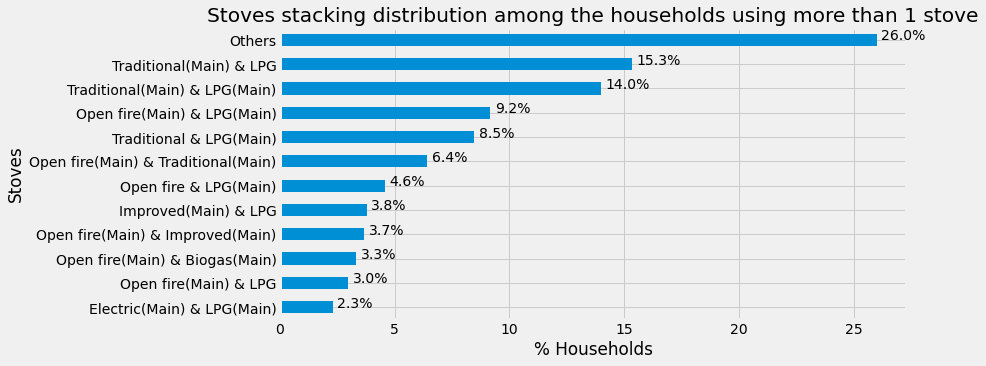

In [42]:
summary_stacks.sort_values().plot(kind='barh', figsize = (10,5));
plt.title('Stoves stacking distribution among the households using more than 1 stove');

for i, value in enumerate(sorted(summary_stacks.values)):
    plt.text(value+0.2,i, f'{value:.1f}%');
    
plt.xlabel('% Households');
plt.ylabel('Stoves');

### Time needed for cooking



Question: *How much time do household members spend preparing the cookstove and fuel for each meal on average [including
setting up the fuel and turning on the stove but not including gathering fuel or cooking time]?* This question is found in J22

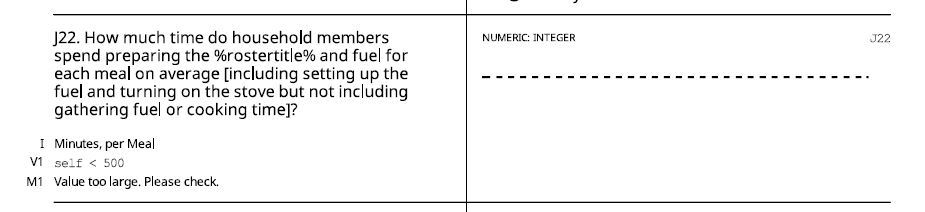

In [43]:
Image('references/time needed for cooking.JPG')

In [44]:
cookstoves.J22.value_counts().sort_index()

0     1730
1      286
2      189
3      124
4       98
5     1572
6       80
7      110
8      167
9       19
10    1314
11       8
12      63
13       7
14       4
15     650
16       2
17       1
18       3
20     295
22       1
25      88
30      63
35       6
40       1
45       3
50       5
55       1
60       9
65       2
70       1
75       1
80       1
90       6
Name: J22, dtype: int64

> The column J22 has up to 34 unique values, some close to each other. Let's put them into groups for better visualization.

In [45]:
#Grouping the required time
bins = [-1,5,10,20,30,40]
groups = ['0-5', '5-10', '10-20', '20-30','30+']
cookstoves['Time Required'] = pd.cut(cookstoves['J22'],bins, labels = groups)

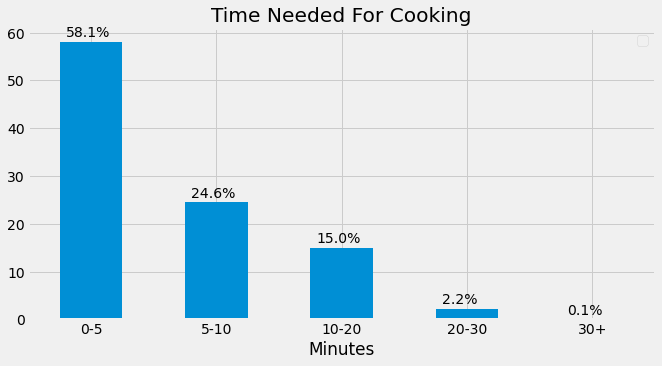

In [46]:
#Counting the groups & ploting
time_required = cookstoves['Time Required'].value_counts(normalize=True)*100
time_required.to_frame().plot(kind='bar', figsize = (10,5))
for i, values in enumerate(time_required.values):
    plt.text(i-0.2,values+1,f'{values:.1f}%')
plt.xticks(rotation = 0);
plt.legend([]);
plt.xlabel('Minutes');
plt.title('Time Needed For Cooking');


> On average, more than half uses 0 to 5 minutes to prepare the cookstove and fuel for each meal.